In [60]:
import datetime as dt
import mplfinance as mpf
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size'      : 16,
    'axes.grid'      : True,
    'grid.linestyle' : '--',
    'figure.figsize' : [12, 4]
})
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


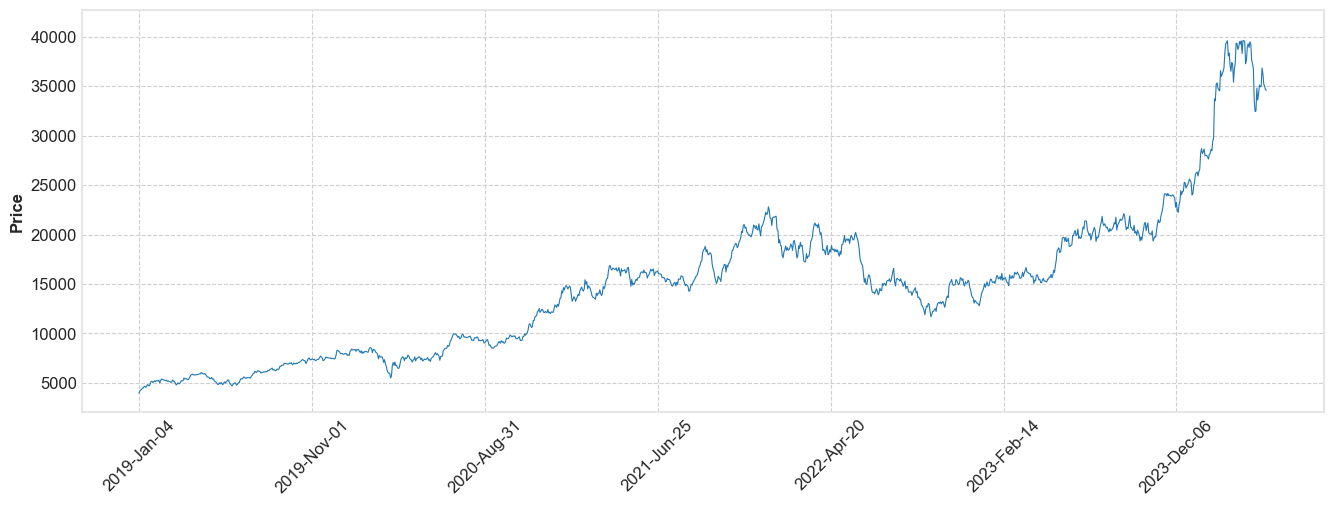

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-04,4006.666748,4016.666748,3865.000000,3961.666748,3466.172852,5653800
2019-01-07,4146.666504,4248.333496,4133.333496,4213.333496,3686.363281,5167500
2019-01-08,4233.333496,4301.666504,4181.666504,4280.000000,3744.691895,5411100
2019-01-09,4261.666504,4351.666504,4251.666504,4350.000000,3805.936768,3606900
2019-01-10,4360.000000,4470.000000,4346.666504,4463.333496,3905.095215,5907000
...,...,...,...,...,...,...
2024-05-08,36950.000000,37040.000000,36280.000000,36280.000000,36280.000000,2742000
2024-05-09,36120.000000,36230.000000,35100.000000,35210.000000,35210.000000,2979900
2024-05-10,35530.000000,36060.000000,34830.000000,35000.000000,35000.000000,3403100


In [334]:
start = dt.date(2019, 1, 1)
end = dt.date(2024, 5, 15)

#ticker = '6920.T' # レーザーテック
#ticker = '7735.T' # スクリーン
ticker = '8035.T' # 東京エレクトロン
#ticker = '^N225'
#ticker = 'USDJPY=X'
df0 = yf.download(ticker, start, end)
mpf.plot(df0, type='line', style='binance', figratio=(12, 4))
df0

In [335]:
df = pd.DataFrame({'ds': df0.index, 'y': df0['Close']}).reset_index(drop=True)
df

,ds,y
0,2019-01-04,3961.666748
1,2019-01-07,4213.333496
2,2019-01-08,4280.000000
3,2019-01-09,4350.000000
4,2019-01-10,4463.333496
...,...,...
1300,2024-05-08,36280.000000
1301,2024-05-09,35210.000000
1302,2024-05-10,35000.000000
1303,2024-05-13,34640.000000


In [336]:
m = Prophet()
#m = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=1.0)

m.fit(df)

19:06:07 - cmdstanpy - INFO - Chain [1] start processing
19:06:07 - cmdstanpy - INFO - Chain [1] done processing


In [337]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1330,2024-06-09
1331,2024-06-10
1332,2024-06-11
1333,2024-06-12
1334,2024-06-13


In [338]:
forecast = m.predict(future)
forecast2 = forecast[forecast['ds'].dt.dayofweek < 5]
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-04,3144.191694,1621.594931,4894.110149,3144.191694,3144.191694,74.249591,74.249591,74.249591,-150.273921,-150.273921,-150.273921,224.523512,224.523512,224.523512,0.0,0.0,0.0,3218.441285
1,2019-01-07,3195.705752,1617.616255,5270.565366,3195.705752,3195.705752,205.770821,205.770821,205.770821,-191.830668,-191.830668,-191.830668,397.601489,397.601489,397.601489,0.0,0.0,0.0,3401.476573
2,2019-01-08,3212.877104,1770.361581,5152.513221,3212.877104,3212.877104,289.592744,289.592744,289.592744,-157.207432,-157.207432,-157.207432,446.800177,446.800177,446.800177,0.0,0.0,0.0,3502.469848
3,2019-01-09,3230.048457,1758.843213,5439.906000,3230.048457,3230.048457,337.529864,337.529864,337.529864,-153.111950,-153.111950,-153.111950,490.641815,490.641815,490.641815,0.0,0.0,0.0,3567.578321
4,2019-01-10,3247.219809,1720.217681,5400.973264,3247.219809,3247.219809,381.385430,381.385430,381.385430,-147.239806,-147.239806,-147.239806,528.625236,528.625236,528.625236,0.0,0.0,0.0,3628.605239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2024-06-07,36970.763155,35742.466529,39145.909861,36948.227490,36981.727220,517.943392,517.943392,517.943392,-150.273921,-150.273921,-150.273921,668.217313,668.217313,668.217313,0.0,0.0,0.0,37488.706547
1331,2024-06-10,37130.521442,35747.645640,39269.210819,37100.166334,37152.890832,375.936215,375.936215,375.936215,-191.830668,-191.830668,-191.830668,567.766883,567.766883,567.766883,0.0,0.0,0.0,37506.457657
1332,2024-06-11,37183.774204,35905.676076,39331.950373,37147.109842,37209.860229,375.770568,375.770568,375.770568,-157.207432,-157.207432,-157.207432,532.978001,532.978001,532.978001,0.0,0.0,0.0,37559.544773
1333,2024-06-12,37237.026967,35559.306890,39196.228193,37195.837260,37266.230262,344.592251,344.592251,344.592251,-153.111950,-153.111950,-153.111950,497.704201,497.704201,497.704201,0.0,0.0,0.0,37581.619218


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


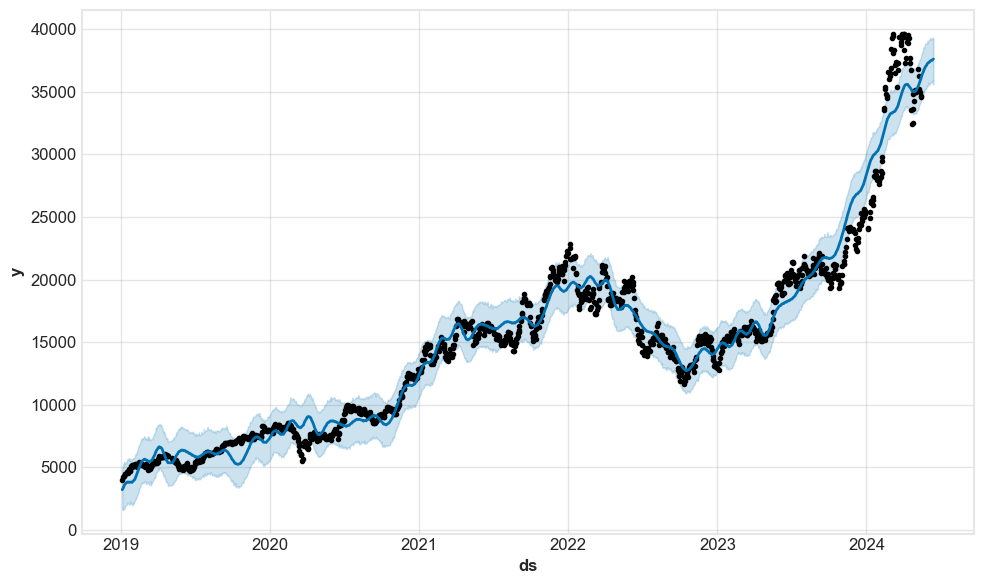

In [339]:
fig1 = m.plot(forecast2)

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

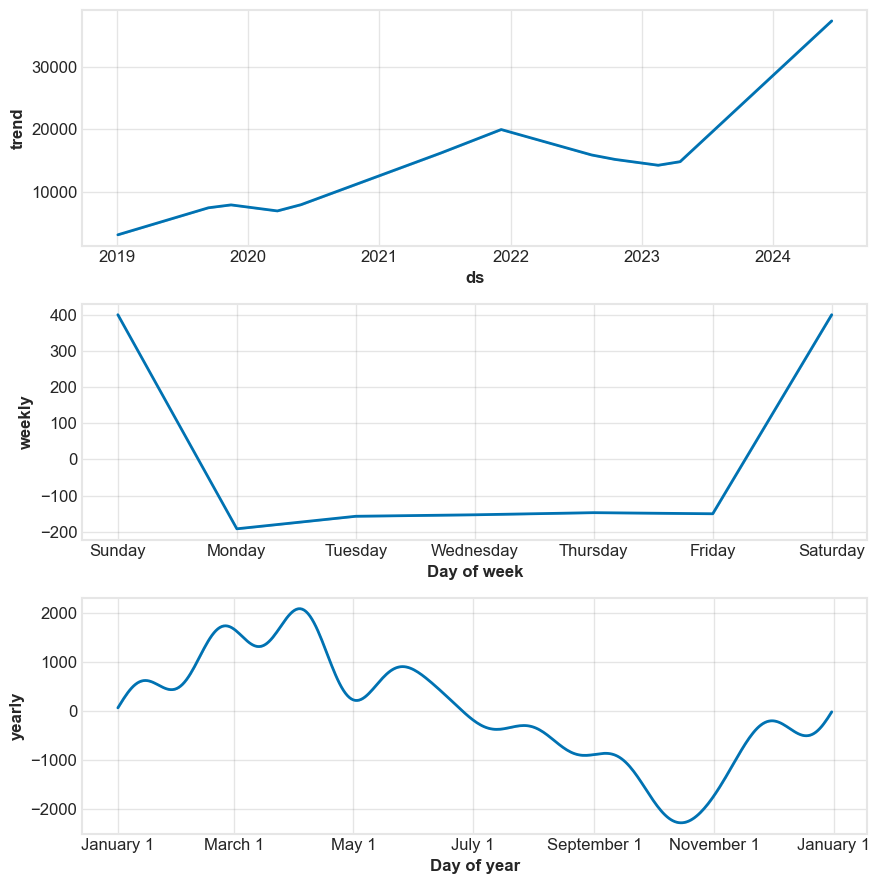

In [340]:
fig2 = m.plot_components(forecast2)

In [341]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|                                                     | 0/5 [00:00<?, ?it/s]19:06:28 - cmdstanpy - INFO - Chain [1] start processing
19:06:28 - cmdstanpy - INFO - Chain [1] done processing
 20%|█████████                                    | 1/5 [00:00<00:00,  5.99it/s]19:06:28 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00,  5.54it/s]19:06:29 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing
 60%|███████████████████████████                  | 3/5 [00:00<00:00,  5.69it/s]19:06:29 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  4.97it/s]19:06:29 - cmdstanpy - INFO - Chain [1] start processing
19:06:29 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████████████████████████

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-05-26,15673.708446,15238.064338,16086.412827,15653.333008,2021-05-25
1,2021-05-27,15670.946237,15256.019013,16090.171499,15706.666992,2021-05-25
2,2021-05-28,15684.822346,15253.741292,16099.665645,16096.666992,2021-05-25
3,2021-05-31,15689.312257,15270.025298,16094.291535,16220.000000,2021-05-25
4,2021-06-01,15747.656772,15326.854949,16127.269649,16226.666992,2021-05-25


In [342]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,6.914242e+06,2629.494560,1772.454905,0.097703,0.049601,0.105148,0.440574
1,36 days,7.230047e+06,2688.874591,1807.541916,0.099206,0.048128,0.107072,0.437158
2,37 days,7.599067e+06,2756.640524,1852.064514,0.101243,0.049091,0.109546,0.426230
3,38 days,7.912805e+06,2812.970924,1901.797573,0.104068,0.051999,0.112444,0.412568
4,39 days,8.359669e+06,2891.309267,1973.535037,0.107892,0.054373,0.116563,0.398907


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


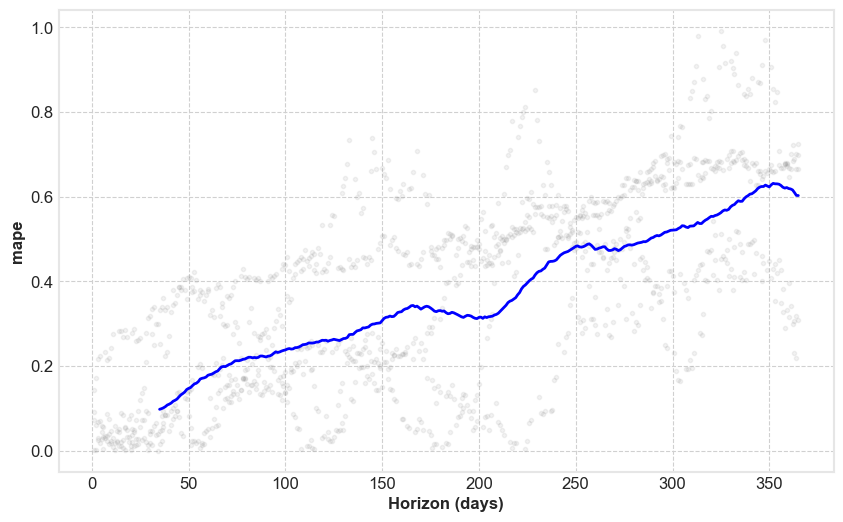

In [343]:
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [344]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    #df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
  0%|                                                     | 0/5 [00:00<?, ?it/s]19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
 40%|██████████████████                           | 2/5 [00:00<00:00, 10.75it/s]19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████████████████████████████████         | 4/5 [00:00<00:00,  7.37it/s]19:06:33 - cmdstanpy - INFO - Chain [1] start processing
19:06:33 - cmdstanpy - INFO - Chain [1] done processing
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  7.91it/s]
1

    changepoint_prior_scale  seasonality_prior_scale         rmse
0                     0.001                     0.01  5869.072449
1                     0.001                     0.10  5819.573608
2                     0.001                     1.00  5782.898062
3                     0.001                    10.00  5785.098006
4                     0.010                     0.01  9667.542463
5                     0.010                     0.10  9637.669041
6                     0.010                     1.00  9655.759101
7                     0.010                    10.00  9554.856491
8                     0.100                     0.01  8913.266537
9                     0.100                     0.10  9015.353787
10                    0.100                     1.00  9006.322934
11                    0.100                    10.00  9000.724778
12                    0.500                     0.01  7889.147884
13                    0.500                     0.10  8538.529894
14        

In [345]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}
